https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb#scrollTo=E-hlmIU5tN3P


# Tutorial 1 (housing) Data Exploration and Visualization (Getting to know your data)

## Setup

In [57]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [58]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [59]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [60]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

`load_housing_data` function loads the `housing.csv` into a panda `dataframe`

In [61]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "covid.csv")
    return pd.read_csv(csv_path)

In [66]:
covid = load_housing_data() # "housing" is a pandas DataFrame object containing all the data
covid.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Each row represents the information gathered from one district of the California Housing Data Set:  https://www.kaggle.com/harrywang/housing

In [63]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
covid.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220567 entries, 0 to 220566
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    220567 non-null  object 
 1   continent                                   207881 non-null  object 
 2   location                                    220567 non-null  object 
 3   date                                        220567 non-null  object 
 4   total_cases                                 211608 non-null  float64
 5   new_cases                                   211311 non-null  float64
 6   new_cases_smoothed                          210115 non-null  float64
 7   total_deaths                                192500 non-null  float64
 8   new_deaths                                  192425 non-null  float64
 9   new_deaths_smoothed                         191245 non-null  float64
 

All attributes are numerical, except the ocean_proximity field.

In [67]:
covid["new_tests"].value_counts() # Obviously ocean_proximity is a categorical attribuite
# Q3 What does the value_count() method display?

1.0          98
2.0          75
4.0          61
5.0          58
7.0          51
             ..
1413951.0     1
1281598.0     1
1559895.0     1
1551124.0     1
7734.0        1
Name: new_tests, Length: 38683, dtype: int64

In [68]:
#This method shows a statistical summary of the numerical attributes 
covid.describe() 

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.116080e+05,2.113110e+05,2.101150e+05,1.925000e+05,192425.000000,191245.000000,210640.000000,210343.000000,209152.000000,191545.000000,...,136942.000000,135067.000000,88877.000000,160829.000000,206079.000000,176282.000000,7.460000e+03,7460.000000,7507.000000,7460.000000
mean,4.263552e+06,1.246112e+04,1.250012e+04,7.275786e+04,141.252010,141.984557,57370.320788,190.170279,190.452006,676.818067,...,10.673675,32.807927,50.840099,3.084476,73.626907,0.724854,4.709611e+04,9.798906,14.503727,1303.267724
std,2.671392e+07,8.595346e+04,8.405133e+04,3.748453e+05,738.772972,724.307457,102595.261881,1052.219179,668.774962,963.533662,...,10.623571,13.534004,31.840010,2.549987,7.447488,0.149690,1.305588e+05,13.596222,26.623740,1698.241936
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,4.056000e+03,0.000000e+00,6.286000e+00,1.100000e+02,0.000000,0.000000,1019.117000,0.000000,1.395000,28.456000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,2.867500e+01,0.430000,-0.160000,19.952271
50%,4.669400e+04,5.700000e+01,9.700000e+01,1.132000e+03,1.000000,1.571000,9742.876000,8.081000,19.853000,204.547000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.716250e+03,7.300000,7.380000,772.399627
75%,5.042840e+05,9.780000e+02,1.142857e+03,9.570250e+03,15.000000,16.143000,69065.914750,99.410000,136.660000,1002.474000,...,19.300000,41.300000,82.502000,4.200000,79.070000,0.845000,3.355805e+04,15.362500,20.150000,2022.755636
max,6.177872e+08,4.081621e+06,3.436126e+06,6.545929e+06,17737.000000,14858.143000,656238.177000,195005.313000,36401.607000,6423.698000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.250000,9766.306877


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

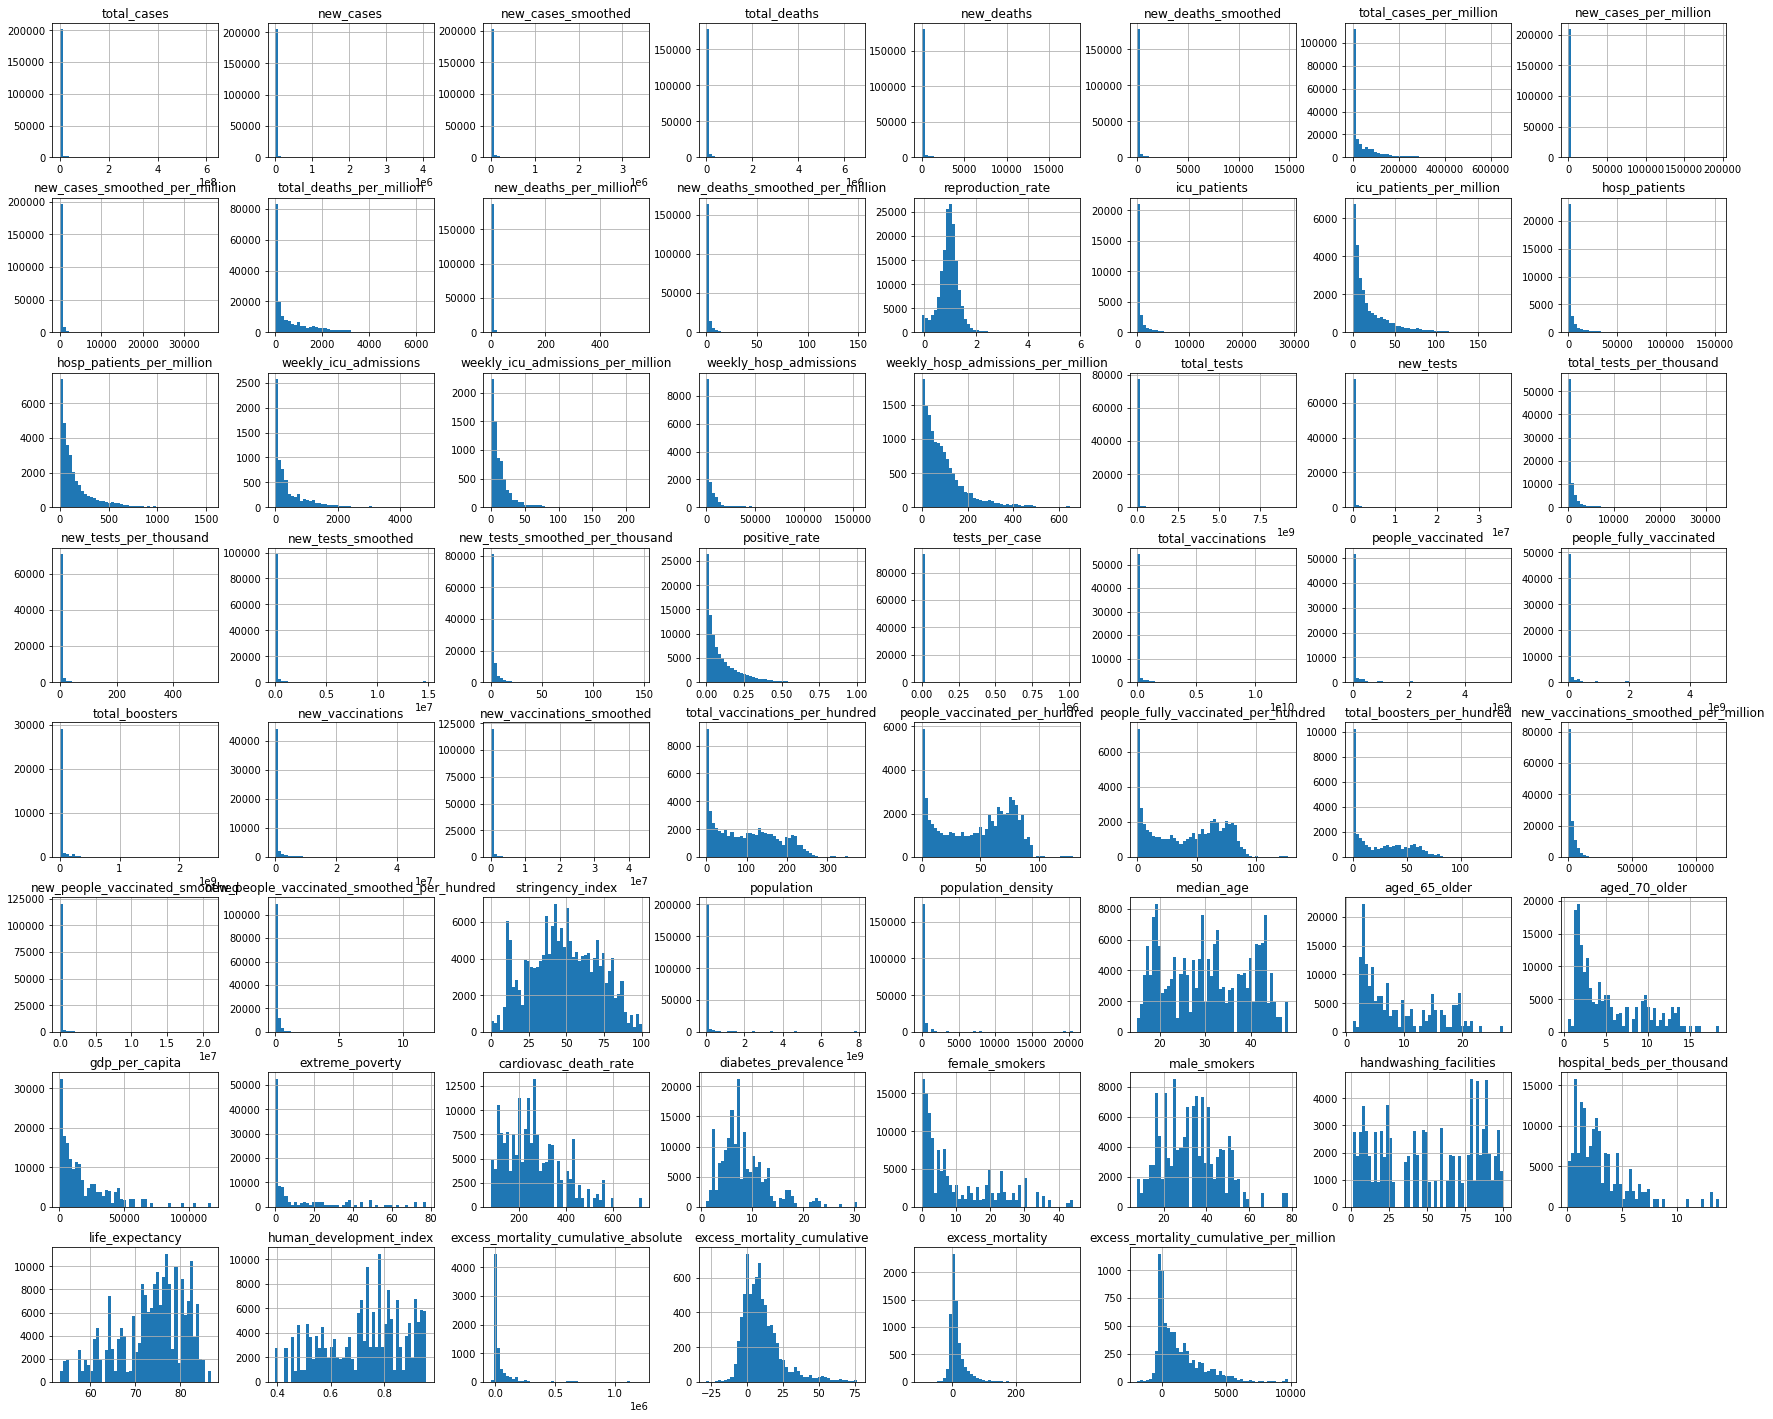

In [70]:
#To plot a histogram for each numerical attribute
covid.hist(bins=50, figsize=(30,25))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram

# Visualizing Geographical Data

<AxesSubplot:xlabel='total_cases', ylabel='hosp_patients'>

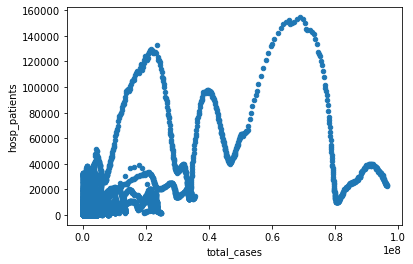

In [75]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
covid.plot(kind="scatter", x="total_cases", y="hosp_patients")


<AxesSubplot:xlabel='total_vaccinations', ylabel='hosp_patients'>

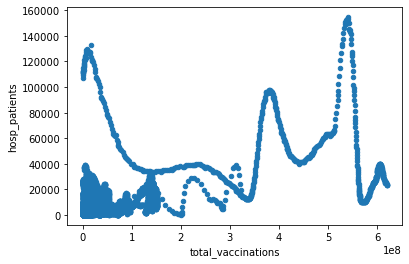

In [79]:
covid.plot(kind="scatter", x="total_vaccinations", y="hosp_patients")

In [77]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = covid.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [78]:
corr_matrix["hosp_patients"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

hosp_patients             1.000000
weekly_hosp_admissions    0.964969
icu_patients              0.948829
new_deaths_smoothed       0.910049
weekly_icu_admissions     0.858878
                            ...   
male_smokers             -0.067700
tests_per_case           -0.073649
population_density       -0.076042
handwashing_facilities   -0.076282
cardiovasc_death_rate    -0.083854
Name: hosp_patients, Length: 62, dtype: float64

array([[<AxesSubplot:xlabel='total_cases', ylabel='total_cases'>,
        <AxesSubplot:xlabel='icu_patients', ylabel='total_cases'>,
        <AxesSubplot:xlabel='people_vaccinated', ylabel='total_cases'>,
        <AxesSubplot:xlabel='total_deaths', ylabel='total_cases'>],
       [<AxesSubplot:xlabel='total_cases', ylabel='icu_patients'>,
        <AxesSubplot:xlabel='icu_patients', ylabel='icu_patients'>,
        <AxesSubplot:xlabel='people_vaccinated', ylabel='icu_patients'>,
        <AxesSubplot:xlabel='total_deaths', ylabel='icu_patients'>],
       [<AxesSubplot:xlabel='total_cases', ylabel='people_vaccinated'>,
        <AxesSubplot:xlabel='icu_patients', ylabel='people_vaccinated'>,
        <AxesSubplot:xlabel='people_vaccinated', ylabel='people_vaccinated'>,
        <AxesSubplot:xlabel='total_deaths', ylabel='people_vaccinated'>],
       [<AxesSubplot:xlabel='total_cases', ylabel='total_deaths'>,
        <AxesSubplot:xlabel='icu_patients', ylabel='total_deaths'>,
        <AxesSubpl

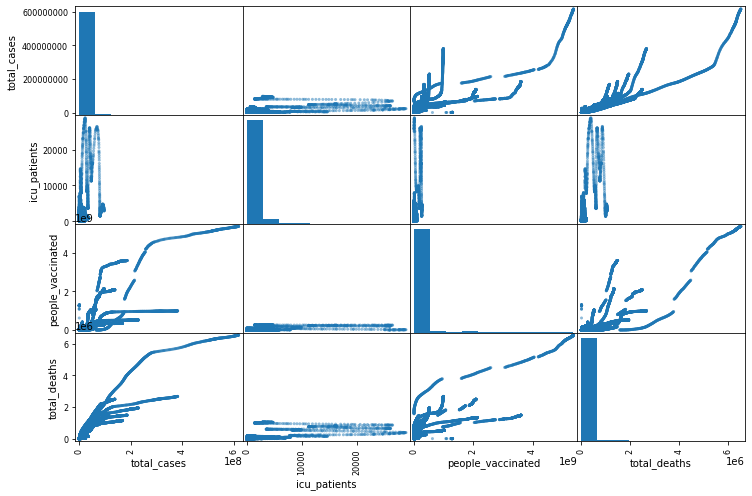

In [80]:
from pandas.plotting import scatter_matrix

attributes = ["total_cases", "icu_patients", "people_vaccinated",
              "total_deaths"]
scatter_matrix(covid[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(0.0, 20000.0, 0.0, 20.0)

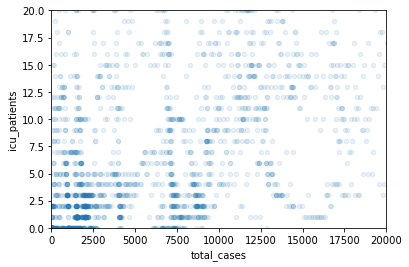

In [99]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
covid.plot(kind="scatter", x="total_cases", y="icu_patients",
             alpha=0.1)
plt.axis([0, 20000, 0, 20])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

# Experimenting with Attribute Combinations

In [87]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

covid["total_recovered"] = (covid["total_cases"]-covid["total_deaths"]) - covid["new_cases"]
#housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
#housing["population_per_household"]=housing["population"]/housing["households"]

In [89]:
corr_matrix = covid.corr()
corr_matrix["total_recovered"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

total_recovered                               1.000000
total_cases                                   0.999983
total_deaths                                  0.936004
total_tests                                   0.857852
people_fully_vaccinated                       0.829484
                                                ...   
new_people_vaccinated_smoothed_per_hundred   -0.032019
extreme_poverty                              -0.036405
cardiovasc_death_rate                        -0.039311
stringency_index                             -0.092600
weekly_icu_admissions_per_million            -0.125396
Name: total_recovered, Length: 63, dtype: float64

In [ ]:
#Q10 Plot the scatter plot of the rooms_per_household against median_house_value
#Q11 Now use the housing describe method to view the statistical summary of the dataset 

# Prepare the Data for Machine Learning Algorithms

In [ ]:
#housing_labels = housing["median_house_value"].copy()
#housing = housing.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
# First revert back to the original data set by dropping the new fearures  
housing = housing.drop("rooms_per_household", axis=1) 
housing = housing.drop("bedrooms_per_room", axis=1) 
housing = housing.drop("population_per_household", axis=1) 
housing.head()

## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


In [ ]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  
#Q12 What is displayed below? Note your observation 

In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12


In [ ]:
median = housing["total_bedrooms"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13


In [ ]:
sample_incomplete_rows

## Scikit-Learn solution (optional)


In [ ]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [ ]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
housing_num = housing.drop("ocean_proximity", axis=1) 

In [ ]:
imputer.fit(housing_num)

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [ ]:
imputer.statistics_

In [ ]:
housing_num.median().values #Check that this is the same as manually computing the median of each attribute


In [ ]:
X = imputer.transform(housing_num) # transform the data set

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index) # load the new tranformed data set into the pandas frame housing_tr

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values] # show the rows with previously missing values 

### Handling Text and Categorical Attributes

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances 

In [ ]:
housing_cat.tail(10)
# look at the value of  'ocean_proximity' for the last 10 instances

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?


In [ ]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


In [ ]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
type(housing_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

In [ ]:
housing_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

In [ ]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_         # Get a list of categories

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [ ]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the housing data set